In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter


In [2]:
def measure_difference(filename_non_poisoned: str, filename_poisoned: str):
    df_non_poisoned = pd.read_csv('../experimental-results/' + filename_non_poisoned, sep=',',header=0)
    df_poisoned = pd.read_csv('../experimental-results/' + filename_poisoned, sep=',',header=0)
    
    datasets = ['./data/books_200M_uint64', './data/fb_200M_uint64', './data/osm_cellids_200M_uint64', './data/wiki_ts_200M_uint64']
    indexes = ['ALEX', 'BTree', 'DynamicPGM']
    
    performance_impact = {}
    for index_name in indexes:
        performance_impact[index_name] = []
        
    for dataset_name in datasets:
        for index_name in indexes:
            
            
            throughput_non_poisoned = df_non_poisoned[(df_non_poisoned["dataset_name"] == dataset_name) & (df_non_poisoned["index_name"]==index_name)]['throughput_in_s'].mean()
            throughput_poisoned = df_poisoned[(df_poisoned["dataset_name"] == dataset_name) & (df_poisoned["index_name"]==index_name)]['throughput_in_s'].mean()
            
            # decrease should be positive, thus indicating a performance degredation
            if throughput_poisoned == 0:
                decrease_in_percent = 0.0
            else:
                decrease = throughput_non_poisoned - throughput_poisoned
                decrease_in_percent = decrease / throughput_non_poisoned
                  
            performance_impact[index_name].append(decrease_in_percent)
            
    N = 4
    ind = np.arange(N) 
    width = 0.14

    #fig, ax = plt.subplots()
    bar1 = plt.bar(ind, performance_impact['ALEX'], width, color = 'green')
    bar2 = plt.bar(ind+width, performance_impact['BTree'], width, color = 'orange')
    bar3 = plt.bar(ind+width*2, performance_impact['DynamicPGM'], width, color = 'blue')
    #bar4 = plt.bar(ind+width*3, performance_impact['LIPP'], width, color = 'red')

    plt.xlabel("Dataset")
    plt.ylabel('Performance impact in %')

    plt.xticks(ind+width,['books', 'fb', 'osmc', 'wiki'])


    # Put a legend above plot
    plt.legend((bar1, bar2, bar3), ('ALEX', 'B-Tree', 'Dynamic-PGM'), bbox_to_anchor=(0,1.02,1,0.2), loc='upper center', ncol=4)
    plt.show()
            
    return performance_impact

In [18]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1f' % (x * 1e-6)


formatter = FuncFormatter(millions)

def plot_chart_for_workload(filename : str, title = None):
    df = pd.read_csv('../experimental-results/' + filename, sep=',',header=0)

    datasets = ['./data/books_200M_uint64', './data/fb_200M_uint64', './data/osm_cellids_200M_uint64', './data/wiki_ts_200M_uint64']

    results_alex = []
    results_btree = []
    results_dpgm = []
    #results_lipp = []
    for dataset_name in datasets:
        results_alex.append(df[(df["dataset_name"] == dataset_name) & (df["index_name"]=='ALEX')]['throughput_in_s'].mean())
        results_btree.append(df[(df["dataset_name"] == dataset_name) & (df["index_name"]=='BTree')]['throughput_in_s'].mean())
        results_dpgm.append(df[(df["dataset_name"] == dataset_name) & (df["index_name"]=='DynamicPGM')]['throughput_in_s'].mean())
        #results_lipp.append(df[(df["dataset_name"] == dataset_name) & (df["index_name"]=='LIPP')]['throughput_in_s'].mean())

    print("ALEX", results_alex)
    print("B-TREE", results_btree)
    print("Dynamic-PGM", results_dpgm)
    

    N = 4
    ind = np.arange(N) 
    width = 0.14

    fig, ax = plt.subplots()
    bar1 = plt.bar(ind, results_alex, width, color = 'green')
    bar2 = plt.bar(ind+width, results_btree, width, color = 'orange')
    bar3 = plt.bar(ind+width*2, results_dpgm, width, color = 'blue')
    #bar4 = plt.bar(ind+width*3, results_lipp, width, color = 'red')

    plt.xlabel("Dataset")
    plt.ylabel('Throughput (million ops / sec)')

    plt.xticks(ind+width,['books', 'fb', 'osmc', 'wiki'])

    ax.yaxis.set_major_formatter(formatter)
    if title is not None:
        plt.title(title)
    
    # Put a legend above plot
    plt.legend((bar1, bar2, bar3), ('ALEX', 'B-Tree', 'Dynamic-PGM'), bbox_to_anchor=(0,1.02,1,0.2), loc='upper center', ncol=4)
    plt.show()

## Non-poisoned

ALEX [16162215.384615384, 17498954.545454547, 6194756.153846154, 13687183.846153846]
B-TREE [9863725.833333334, 9399892.5, 14897510.0, 9259387.75]
Dynamic-PGM [926508.8571428572, 731971.5, 917548.1, 1268112.0]


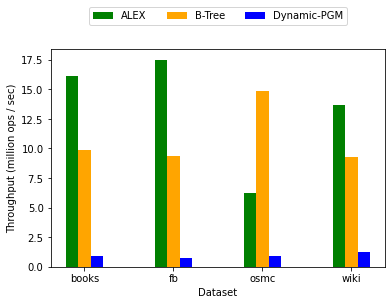

In [19]:
plot_chart_for_workload('non_poisoned_read_only.csv')

ALEX [10728106.153846154, 1313206.6666666667, 4704530.769230769, 9263433.076923076]
B-TREE [9238867.5, 9088619.166666666, 8839391.666666666, 6119975.0]
Dynamic-PGM [1215244.2857142857, 998036.5, 872240.5714285715, 1473184.8]


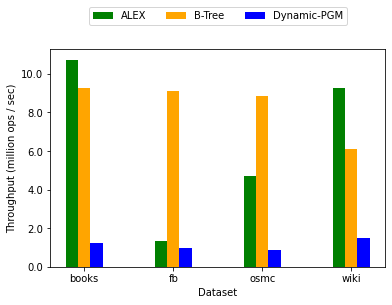

In [20]:
plot_chart_for_workload('non_poisoned_read_heavy.csv')

ALEX [2921892.3076923075, 2408246.6666666665, 1770611.5384615385, 1676874.6153846155]
B-TREE [1796295.8333333333, 1774400.0, 1732262.5, 1720761.6666666667]
Dynamic-PGM [2605189.0, 2289189.0, 2295980.0, 3698999.0]


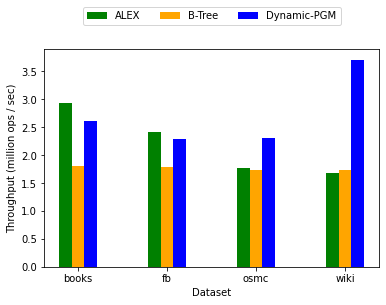

In [21]:
plot_chart_for_workload('non_poisoned_write_heavy.csv')

ALEX [2353992.3076923075, 2534546.6666666665, 1677064.6153846155, 1615591.5384615385]
B-TREE [1477951.3333333333, 1749967.5, 1495389.5833333333, 1615169.1666666667]
Dynamic-PGM [3028375.0, 2846518.0, 2761089.0, 4558578.0]


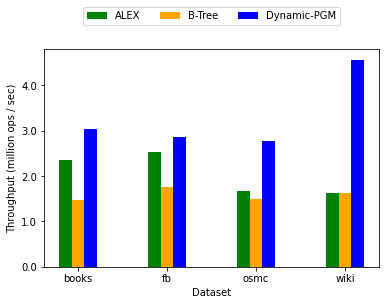

In [23]:
plot_chart_for_workload('non_poisoned_write_only.csv')

## Poisoned

ALEX [16243040.76923077, 17821675.454545453, 6387984.615384615, 13233802.307692308]
B-TREE [9460745.5, 9384162.25, 14809695.833333334, 9134914.75]
Dynamic-PGM [861921.4285714285, 702158.2, 899915.9, 1017923.5555555555]


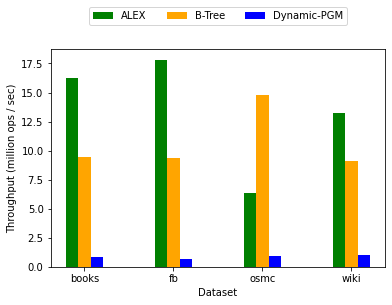

In [24]:
plot_chart_for_workload('poisoned_read_only.csv')

ALEX [9819021.538461538, 1286960.0, 4586141.538461538, 9204752.307692308]
B-TREE [9366380.0, 9083855.0, 8668881.666666666, 6143775.0]
Dynamic-PGM [1245485.7142857143, 1011879.3, 784075.4, 1169301.0]


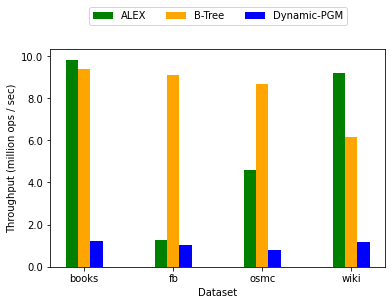

In [25]:
plot_chart_for_workload('poisoned_read_heavy.csv')

ALEX [2457741.5384615385, 2358933.3333333335, 1816547.6923076923, 1672190.7692307692]
B-TREE [1677875.0, 1705110.0, 1751328.3333333333, 1790405.8333333333]
Dynamic-PGM [2494472.0, 2240320.0, 2310215.0, 2701049.0]


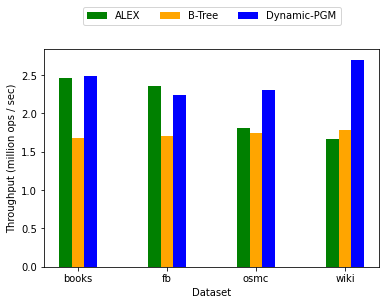

In [28]:
plot_chart_for_workload('poisoned_write_heavy.csv')

ALEX [2128055.0, 2445033.3333333335, 1581750.7692307692, 1579460.0]
B-TREE [1508457.0833333333, 1738097.5, 1481324.1666666667, 1582920.8333333333]
Dynamic-PGM [3050597.0, 2777453.0, 2719388.0, 3949376.0]


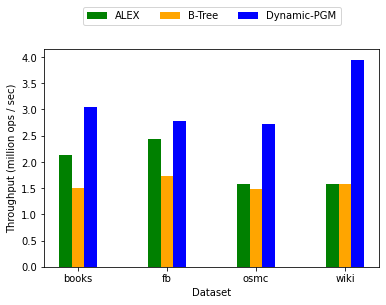

In [29]:
plot_chart_for_workload('poisoned_write_only.csv')

## Calculate performance deterioration

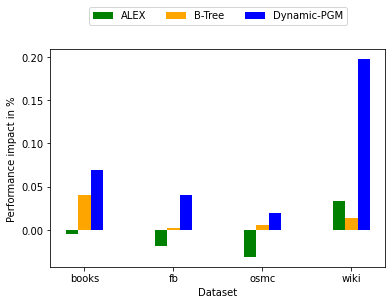

{'ALEX': [-0.005000885255639063, -0.01844229655278092, -0.03119226273636143, 0.03312453047738816], 'BTree': [0.04085477842171038, 0.0016734499889227456, 0.005894553295595442, 0.013442897452912045], 'DynamicPGM': [0.06971053549407136, 0.040730137717110634, 0.019216649241603743, 0.19729207234411827]}


In [12]:
diff = measure_difference('non_poisoned_read_only.csv', 'poisoned_read_only.csv')
print(diff)

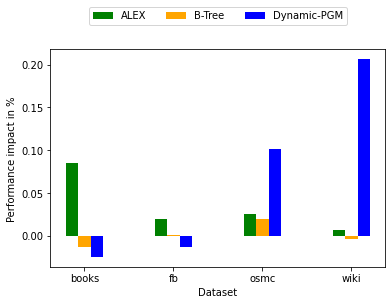

{'ALEX': [0.08473859247363043, 0.01998669922479839, 0.025164939199364324, 0.006334667584197561], 'BTree': [-0.013801745722622388, 0.0005241903725198497, 0.01928978898434753, -0.003888904774937806], 'DynamicPGM': [-0.024885061322179842, -0.013870033811388708, 0.10107896183294127, 0.2062767685357601]}


In [13]:
diff = measure_difference('non_poisoned_read_heavy.csv', 'poisoned_read_heavy.csv')
print(diff)

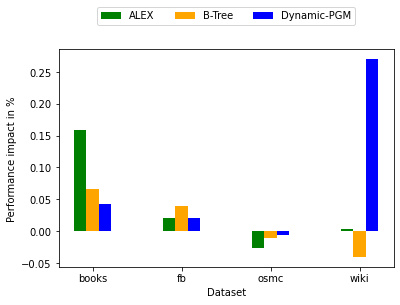

{'ALEX': [0.15885279823928639, 0.020476861451069393, -0.025943665704374144, 0.002793199986972154], 'BTree': [0.06592501699098371, 0.039049819657348966, -0.011006318807532493, -0.04047287199370037], 'DynamicPGM': [0.04249864405231252, 0.02134773494019061, -0.006199966898666365, 0.26978920513360505]}


In [14]:
diff = measure_difference('non_poisoned_write_heavy.csv', 'poisoned_write_heavy.csv')
print(diff)

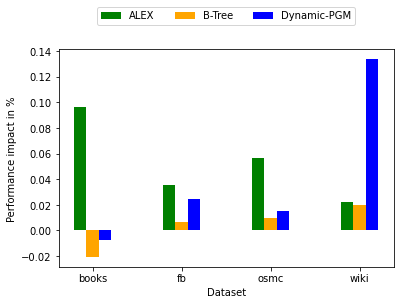

{'ALEX': [0.09598047833631239, 0.03531729540062379, 0.0568337351342823, 0.02236427809961488], 'BTree': [-0.020640564619403345, 0.006782983112543519, 0.009405854382985378, 0.019965916882803393], 'DynamicPGM': [-0.00733792875717175, 0.024262976731571694, 0.015103098813547843, 0.13363860396816726]}


In [15]:
diff = measure_difference('non_poisoned_write_only.csv', 'poisoned_write_only.csv')
print(diff)